In [1]:
from image_classification_simulation.models.vit_baseline import ViT
from image_classification_simulation.data.office31_loader import Office31Loader
import torch
import matplotlib.pyplot as plt

In [2]:
hparams = {
    "loss": "CrossEntropyLoss",
    "batch_size": 16,
    "optimizer": "adamW",
    "num_classes": 31,
    "lr": 0.0003,
    "max_epoch": 2,
    "data": "Office31",
    "num_channels": 3,
    "seed": 1234
}

Number of workers set to: 1
image size set to: 224
Feature batch shape: torch.Size([16, 3, 224, 224])
Labels batch shape: torch.Size([16])


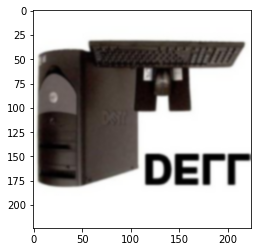

Label: 8


In [3]:
office31_loader = Office31Loader(
    data_dir="../examples/data/domain_adaptation_images/amazon/images",
    eval_dir="../examples/data/domain_adaptation_images/dslr/images",
    hyper_params=hparams
    )
office31_loader.setup(stage="fit")
train_dl=office31_loader.train_dataloader()
val_dl=office31_loader.val_dataloader()

train_features, train_labels = next(iter(train_dl))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
img = img.permute(1, 2, 0)
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")


In [14]:
print(train_features.device, train_labels.device)


cpu cpu


In [17]:
device = 'cpu'#torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViT(hparams).to(device)
#print(model)

print("Input img batch shape: ",train_features.shape)
print("Labels batch shape: ",train_labels.shape)
loss = model.training_step((train_features.to(device), train_labels.to(device)), None)
print(loss)

forward_output = model.forward(train_features)
print("Forward output shape: ", forward_output.shape)
print("Forward output: ", forward_output)


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Input img batch shape:  torch.Size([16, 3, 224, 224])
Labels batch shape:  torch.Size([16])
{'loss': tensor(54.5467, grad_fn=<NllLossBackward0>), 'acc': 0.0}


: 

: 